In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../data/human_vital_signs_dataset_2024.csv")

# Basic inspection
df.head()


,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [2]:
df.info()
print(df.columns)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Patient ID                200020 non-null  int64  
 1   Heart Rate                200020 non-null  int64  
 2   Respiratory Rate          200020 non-null  int64  
 3   Timestamp                 200020 non-null  object 
 4   Body Temperature          200020 non-null  float64
 5   Oxygen Saturation         200020 non-null  float64
 6   Systolic Blood Pressure   200020 non-null  int64  
 7   Diastolic Blood Pressure  200020 non-null  int64  
 8   Age                       200020 non-null  int64  
 9   Gender                    200020 non-null  object 
 10  Weight (kg)               200020 non-null  float64
 11  Height (m)                200020 non-null  float64
 12  Derived_HRV               200020 non-null  float64
 13  Derived_Pulse_Pressure    200020 non-null  i

In [3]:
vital_features = [
    "Heart Rate",
    "Respiratory Rate",
    "Body Temperature",
    "Oxygen Saturation",
    "Systolic Blood Pressure",
    "Diastolic Blood Pressure",
    "Derived_HRV",
    "Derived_MAP"
]

df_vitals = df[vital_features]
df_vitals.head()
df_vitals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Heart Rate                200020 non-null  int64  
 1   Respiratory Rate          200020 non-null  int64  
 2   Body Temperature          200020 non-null  float64
 3   Oxygen Saturation         200020 non-null  float64
 4   Systolic Blood Pressure   200020 non-null  int64  
 5   Diastolic Blood Pressure  200020 non-null  int64  
 6   Derived_HRV               200020 non-null  float64
 7   Derived_MAP               200020 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 12.2 MB


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_vitals = scaler.fit_transform(df_vitals)

scaled_vitals[:5]


array([[0.        , 0.        , 0.5744733 , 0.14040903, 0.48275862,
        0.84210526, 0.71033488, 0.68656716],
       [0.07692308, 0.85714286, 0.34108849, 0.33788429, 0.55172414,
        0.73684211, 0.67062125, 0.65671642],
       [0.07692308, 0.42857143, 0.70136868, 0.70165782, 0.72413793,
        0.42105263, 0.03199689, 0.55223881],
       [1.        , 0.57142857, 0.43649907, 0.00235899, 0.27586207,
        0.10526316, 0.14474557, 0.17910448],
       [0.23076923, 0.57142857, 0.65006756, 0.72476342, 0.96551724,
        0.31578947, 0.68484819, 0.59701493]])

In [5]:
import numpy as np

def create_sliding_windows(data, window_size=30):
    windows = []
    for i in range(len(data) - window_size):
        windows.append(data.iloc[i:i+window_size].values)
    return np.array(windows)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_vitals = scaler.fit_transform(df_vitals)

df_scaled = pd.DataFrame(
    scaled_vitals,
    columns=df_vitals.columns
)

df_scaled.head()
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200020 entries, 0 to 200019
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Heart Rate                200020 non-null  float64
 1   Respiratory Rate          200020 non-null  float64
 2   Body Temperature          200020 non-null  float64
 3   Oxygen Saturation         200020 non-null  float64
 4   Systolic Blood Pressure   200020 non-null  float64
 5   Diastolic Blood Pressure  200020 non-null  float64
 6   Derived_HRV               200020 non-null  float64
 7   Derived_MAP               200020 non-null  float64
dtypes: float64(8)
memory usage: 12.2 MB


In [9]:
WINDOW_SIZE = 30

X_windows = create_sliding_windows(df_scaled, WINDOW_SIZE)

X_windows.shape


(199990, 30, 8)

In [10]:
X_train = X_windows.reshape(
    X_windows.shape[0],
    X_windows.shape[1] * X_windows.shape[2]
)

X_train.shape


(199990, 240)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [12]:
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(latent)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)


In [13]:
autoencoder.compile(
    optimizer='adam',
    loss='mse'
)

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        30,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 240)            │        30,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,576 (322.56 KB)

 Trainable params: 82,576 (322.56 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    shuffle=True
)


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0765 - val_loss: 0.0733
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0730 - val_loss: 0.0722
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0724 - val_loss: 0.0720
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0722 - val_loss: 0.0719
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0722 - val_loss: 0.0718
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0722 - val_loss: 0.0719
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0722 - val_loss: 0.0719
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0721 - val_loss: 0.0718
Epoch 9/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0721 - val_loss: 0.0719
Epoch 10/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0721 - val_loss: 0.0719
Epoch 11/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0721 - val_loss: 0.0718
Epoch 12/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

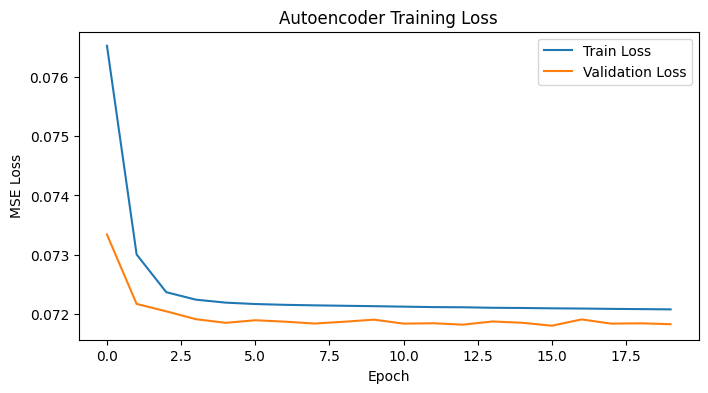

In [15]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()


In [16]:
X_pred = autoencoder.predict(X_train)

reconstruction_error = np.mean(
    np.square(X_train - X_pred),
    axis=1
)

reconstruction_error[:10]


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 723us/step


array([0.06750722, 0.06745144, 0.06885167, 0.06699988, 0.06918529,
       0.06232351, 0.06205295, 0.06256051, 0.06835969, 0.06691194])

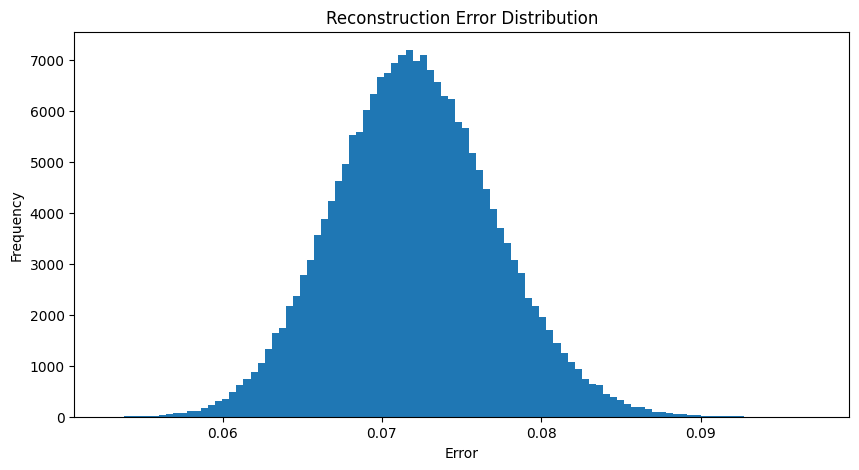

In [17]:
plt.figure(figsize=(10,5))
plt.hist(reconstruction_error, bins=100)
plt.title("Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.show()


In [18]:
threshold = np.percentile(reconstruction_error, 95)
threshold
print(f"Anomaly Detection Threshold: {threshold}")

Anomaly Detection Threshold: 0.08052793681451732


In [19]:
anomalies_ae = reconstruction_error > threshold

np.sum(anomalies_ae)
print(f"Anomaly Detection Threshold: {threshold}")

Anomaly Detection Threshold: 0.08052793681451732


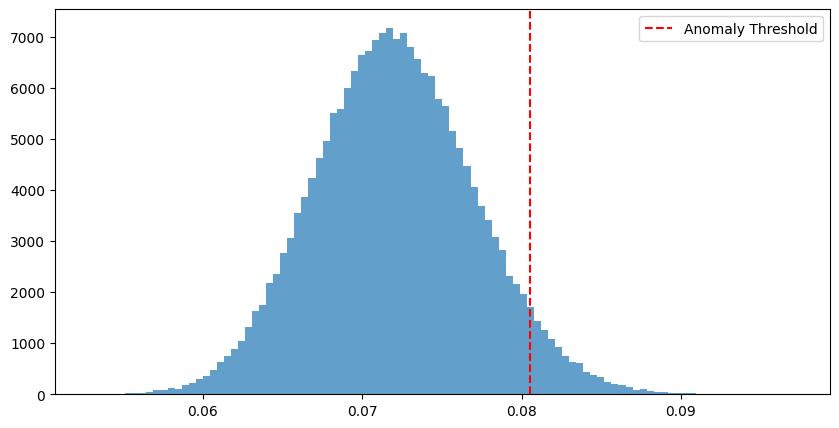

In [20]:
plt.figure(figsize=(10,5))
plt.hist(reconstruction_error, bins=100, alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.show()


In [21]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42
)

iso_forest.fit(X_train)
iso_forest_scores = iso_forest.decision_function(X_train)
iso_forest_anomalies = iso_forest.predict(X_train)

In [22]:
# Isolation Forest anomaly score (higher = more anomalous)
iso_scores = -iso_forest.decision_function(X_train)

# Binary anomaly labels
iso_forest_anomalies = iso_forest.predict(X_train)

iso_scores[:10], iso_forest_anomalies[:10]


(array([-0.01447606, -0.01618665, -0.01825602, -0.01165133, -0.03245148,
        -0.01832075, -0.02459366, -0.02073489, -0.0091155 , -0.01975807]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [23]:
iso_scores_norm = (iso_scores - iso_scores.min()) / (
    iso_scores.max() - iso_scores.min()
)


In [24]:
recon_norm = (reconstruction_error - reconstruction_error.min()) / (
    reconstruction_error.max() - reconstruction_error.min()
)


In [25]:
final_anomaly_score = 0.6 * recon_norm + 0.4 * iso_scores_norm

final_anomaly_score[:10]


array([0.38737348, 0.37833992, 0.38732545, 0.39415739, 0.32316709,
       0.29843832, 0.26441582, 0.2899731 , 0.42487688, 0.35373956])

In [26]:
final_threshold = np.percentile(final_anomaly_score, 95)
final_threshold


np.float64(0.6128911444932469)

In [27]:
final_anomalies = final_anomaly_score > final_threshold

np.sum(final_anomalies)


np.int64(10000)

In [28]:
def severity(score, threshold):
    if score > threshold * 1.3:
        return "High"
    elif score > threshold * 1.1:
        return "Medium"
    else:
        return "Low"

severity_levels = [severity(s, final_threshold) for s in final_anomaly_score]


In [30]:
import joblib

# Save autoencoder (Keras native format)
autoencoder.save("../models/autoencoder_model.keras")

# Save scaler
joblib.dump(scaler, "../models/scaler.pkl")

# (Optional but recommended)
joblib.dump(iso_forest, "../models/isolation_forest.pkl")


['../models/isolation_forest.pkl']